75
109
{1: 3.8095238095238093, 2: 4.346153846153846, 5: 3.78, 4: 4.535714285714286, 6: 3.9444444444444446, 3: 4.3, 8: 3.25, 9: 3.111111111111111, 0: 0}
1.4533333333333334


C:\Users\a6936\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


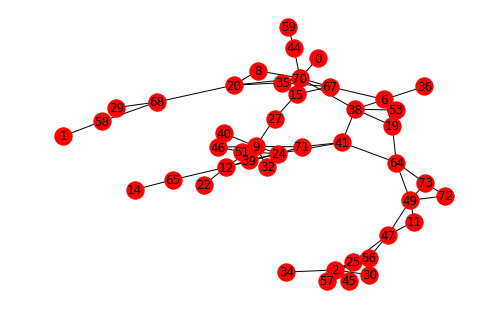

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations as combos
%matplotlib inline
'''-----------import packages-----------'''

'''-----------read graph from txt file-----------'''
g = nx.Graph() # initialize a graph g
df = pd.read_csv('In-class_network.txt',delimiter="\t") # using pandas's DataFrame to store the info of graph.
df.drop(df.columns[6],axis=1,inplace=True) # drop the last column coming from nowhere.
df['IDs-of-acquaintances'][df['IDs-of-acquaintances'] == ' '] = '999' # set the absent value in 'IDs-of-acquaintances' to be '999'.

'''-----------making dict for nodes & edges-----------'''
d = df.set_index('ID')['IDs-of-acquaintances'].to_dict() # combine 'ID' and 'IDs-of-acquaintances' and form a dict.
d = {k: v.split(',') for k, v in d.items()} # change the value from string to list.
d = {k: [int(i) for i in v] for k, v in d.items()} # change the value from string to integer.

for k, v in d.items():
    g.add_edges_from(([(k, t) for t in v])) # adding edges for graph g.
g.remove_node(999)

'''-----------answers to problem 3-b-----------'''
print(g.number_of_nodes()) # P3-b-i
print(g.number_of_edges()) # P3-b-ii
print(nx.average_degree_connectivity(g)) # P3-b-iii
print(g.number_of_edges()/g.number_of_nodes()) # P3-b-iv

Gc = max(nx.connected_component_subgraphs(g), key=len) # P3-b-v
nx.draw(Gc,with_labels=True)

0.03824561403508772
[1, 1, 5, 3, 6, 4, 5, 6, 2, 9, 2, 2, 5, 5, 1, 4, 1, 3, 5, 4, 4, 1, 1, 1, 6, 5, 0, 2, 1, 1, 2, 3, 1, 5, 1, 4, 1, 4, 5, 4, 1, 4, 1, 3, 2, 2, 2, 4, 3, 5, 1, 4, 1, 3, 1, 1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 2, 4, 4, 3, 5, 8, 3, 2, 3, 0]
52


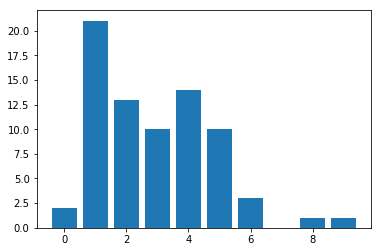

In [14]:
'''-----------answers to problem 3-c-----------'''
g2 = nx.complete_graph(76)
emax = g2.number_of_edges()
e = g.number_of_edges()
print(e/emax)

'''-----------answers to problem 3-d-----------'''
d2 = nx.to_dict_of_lists(g)
deg_list=[0] * 75
for k, v in d2.items():
    deg_list[k] = len(v)
print(deg_list)
dist = dict((i, deg_list.count(i)) for i in deg_list)

lk=[]
lv=[]
for k,v in dist.items():
    lk.append(k)
    lv.append(v)

plt.bar(lk,lv)

'''-----------answers to problem 3-e-----------'''

triple_iter = ((n, nbr, nbr2) for n in g for nbr, nbr2 in combos(g[n],2) if nbr in g[nbr2])
triangles = set(frozenset(tri) for tri in triple_iter)
print(len(triangles))